<a href="https://colab.research.google.com/github/TriptSharma/mlpiv/blob/master/NNTrainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

#print(df)

Saving dataset preprocessed.csv to dataset preprocessed.csv


KeyError: ignored

In [0]:
df = pd.read_csv(r'data.csv', index_col=0)

X = df.drop(['3'], axis=1)[:20000]
y = df['3'][:20000]
print(X.head(), y.head())

       0    1    2         4         5
0  0.005  0.0  0.0 -0.000005  0.000005
1  0.010  0.0  0.0 -0.000011  0.000011
2  0.015  0.0  0.0 -0.000016  0.000016
3  0.020  0.0  0.0 -0.000021  0.000021
4  0.025  0.0  0.0 -0.000027  0.000027 0   -1.470000e-09
1    1.230000e-09
2    8.630000e-10
3    1.070000e-09
4    1.310000e-09
Name: 3, dtype: float64


In [0]:
from sklearn import preprocessing
X_scaled = pd.DataFrame(preprocessing.scale(X))
y_scaled = pd.DataFrame(preprocessing.scale(y))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba72884c50>]],
      dtype=object)

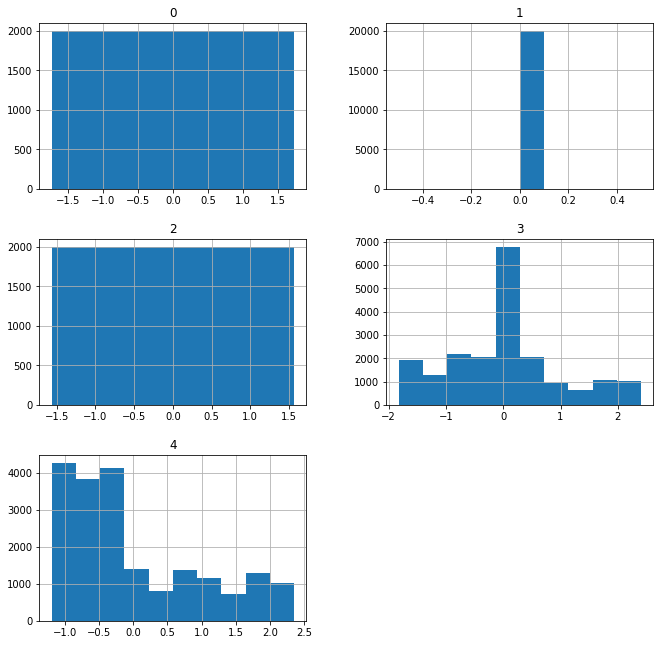

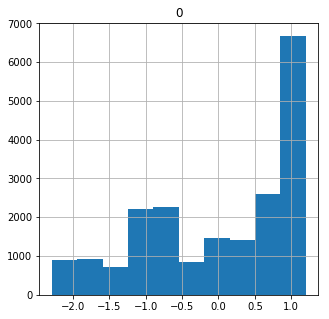

In [0]:
import matplotlib.pyplot as plt
X_scaled[X_scaled.dtypes[(X_scaled.dtypes=="float64")|(X_scaled.dtypes=="int64")].index.values].hist(figsize=[11,11])

y_scaled[y_scaled.dtypes[(y_scaled.dtypes=="float64")].index.values].hist(figsize=[5,5])

In [0]:
X_train, X_test = X_scaled[:18000], X_scaled[18000:]
y_train, y_test = y_scaled[:18000], y_scaled[18000:]

In [0]:
lr_val = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
opt = ['adam', 'sgd', 'adagrad']


In [0]:
def NNRegressionAdam1():
  model = tf.keras.Sequential()
  # Adds a densely-connected layer with 64 units to the model:
  model.add(layers.Dense(64, input_dim=5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  # Add another:
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(layers.Dropout(0.4))
  # Add another:
  model.add(layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(layers.Dropout(0.4))

  # Add another:
  model.add(layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(layers.Dropout(0.4))
  # Add the output layer
  model.add(layers.Dense(1))
  
  optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
  
  model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
  return model


In [0]:
from keras.wrappers.scikit_learn import KerasRegressor

tf.set_random_seed(2)

estimator_adam = KerasRegressor(build_fn=NNRegressionAdam1)
# earlystopper = tf.keras.callbacks.EarlyStopping(monitor='cosine_proximity', baseline=0.99, verbose=True)

#estimator.fit(X_train, y_train, validation_split=0.1, callbacks=[earlystopper], batch_size=1024)
history_adam = estimator_adam.fit(X_scaled, y_scaled, validation_split=0.2, batch_size=1024, epochs=500)
# loss: 0.3994 - mean_absolute_error: 0.4421 - val_loss: 0.6829 - val_mean_absolute_error: 0.6107

Train on 16000 samples, validate on 4000 samples
Epoch 1/500
16000/16000 [==============================] - 1s 64us/sample - loss: 2.0555 - mean_absolute_error: 0.9347 - val_loss: 1.5231 - val_mean_absolute_error: 0.7274
Epoch 2/500
16000/16000 [==============================] - 0s 9us/sample - loss: 1.8405 - mean_absolute_error: 0.8822 - val_loss: 1.4843 - val_mean_absolute_error: 0.7443
Epoch 3/500
16000/16000 [==============================] - 0s 10us/sample - loss: 1.6772 - mean_absolute_error: 0.8251 - val_loss: 1.4566 - val_mean_absolute_error: 0.7595
Epoch 4/500
16000/16000 [==============================] - 0s 9us/sample - loss: 1.5404 - mean_absolute_error: 0.7750 - val_loss: 1.3979 - val_mean_absolute_error: 0.7650
Epoch 5/500
16000/16000 [==============================] - 0s 9us/sample - loss: 1.4455 - mean_absolute_error: 0.7553 - val_loss: 1.3133 - val_mean_absolute_error: 0.7567
Epoch 6/500
16000/16000 [==============================] - 0s 9us/sample - loss: 1.3396 - mean

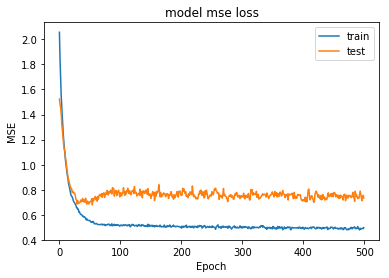

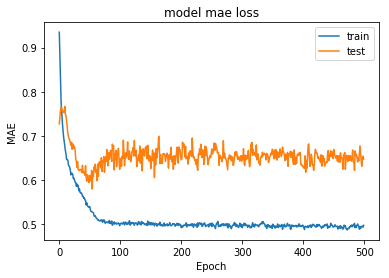

In [0]:
import matplotlib.pyplot as plt
#plotting data
# print(history.history.keys())

# summarize history for mse
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('model mse loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for mae
plt.plot(history_adam.history['mean_absolute_error'])
plt.plot(history_adam.history['val_mean_absolute_error'])
plt.title('model mae loss')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
def NNRegressionSGD1():
  model = tf.keras.Sequential()
  # Adds a densely-connected layer with 64 units to the model:
  model.add(layers.Dense(64, input_dim=5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  # Add another:
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(layers.Dropout(0.4))
  # Add another:
  model.add(layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(layers.Dropout(0.4))

  # Add another:
  model.add(layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(layers.Dropout(0.4))
  # Add the output layer
  model.add(layers.Dense(1))
  
  optimizer = tf.keras.optimizers.SGD(lr=0.001, momentum=0.01, decay=0.0, nesterov=False)
  
  model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'cosine_proximity'])
  return model


In [0]:
tf.set_random_seed(5)

estimator_sgd = KerasRegressor(build_fn=NNRegressionSGD1)
# earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', baseline=0.4, verbose=True)

#estimator.fit(X_train, y_train, validation_split=0.1, callbacks=[earlystopper], batch_size=1024)
history_sgd = estimator_sgd.fit(X_scaled, y_scaled, validation_split=0.2, batch_size=1024, epochs=500)

# print(mae)

Train on 16000 samples, validate on 4000 samples
Epoch 1/500
16000/16000 [==============================] - 1s 57us/sample - loss: 2.1250 - mean_absolute_error: 1.0255 - cosine_proximity: 0.1383 - val_loss: 1.2810 - val_mean_absolute_error: 0.6048 - val_cosine_proximity: -0.7150
Epoch 2/500
16000/16000 [==============================] - 0s 7us/sample - loss: 2.0749 - mean_absolute_error: 1.0081 - cosine_proximity: 0.0593 - val_loss: 1.3072 - val_mean_absolute_error: 0.6203 - val_cosine_proximity: -0.7150
Epoch 3/500
16000/16000 [==============================] - 0s 7us/sample - loss: 2.0362 - mean_absolute_error: 0.9912 - cosine_proximity: -0.0132 - val_loss: 1.3292 - val_mean_absolute_error: 0.6329 - val_cosine_proximity: -0.7150
Epoch 4/500
16000/16000 [==============================] - 0s 7us/sample - loss: 2.0065 - mean_absolute_error: 0.9793 - cosine_proximity: -0.0601 - val_loss: 1.3473 - val_mean_absolute_error: 0.6431 - val_cosine_proximity: -0.3845
Epoch 5/500
16000/16000 [===

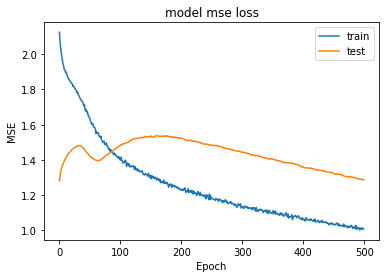

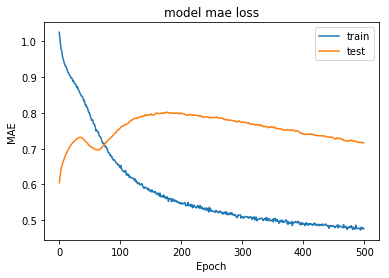

In [0]:
#plotting data
# print(history.history.keys())

# summarize history for mse
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('model mse loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for mae
plt.plot(history_sgd.history['mean_absolute_error'])
plt.plot(history_sgd.history['val_mean_absolute_error'])
plt.title('model mae loss')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
def NNRegressionAdagrad1():
  model = tf.keras.Sequential()
  # Adds a densely-connected layer with 64 units to the model:
  model.add(layers.Dense(64, input_dim=5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  # Add another:
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(layers.Dropout(0.4))
  # Add another:
  model.add(layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(layers.Dropout(0.4))

  # Add another:
  model.add(layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.001)))
  model.add(layers.Dropout(0.4))
  # Add the output layer
  model.add(layers.Dense(1))
  
  optimizer = tf.keras.optimizers.Adagrad(lr=0.001, epsilon=1e-08, decay=0.0000)
   
  model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'cosine_proximity'])
  return model

In [0]:
tf.set_random_seed(5)

estimator_ada = KerasRegressor(build_fn=NNRegressionAdagrad1)
# earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', baseline=0.4, verbose=True)

#estimator.fit(X_train, y_train, validation_split=0.1, callbacks=[earlystopper], batch_size=1024)
history_ada = estimator_ada.fit(X_scaled, y_scaled, validation_split=0.2, batch_size=1024, epochs=500, shuffle=True)

# print(mae)

Train on 16000 samples, validate on 4000 samples
Epoch 1/500
16000/16000 [==============================] - 1s 60us/sample - loss: 1.9521 - mean_absolute_error: 0.9256 - cosine_proximity: -0.2017 - val_loss: 1.4998 - val_mean_absolute_error: 0.7494 - val_cosine_proximity: 0.7150
Epoch 2/500
16000/16000 [==============================] - 0s 8us/sample - loss: 1.8653 - mean_absolute_error: 0.8991 - cosine_proximity: -0.2565 - val_loss: 1.4849 - val_mean_absolute_error: 0.7507 - val_cosine_proximity: 0.7150
Epoch 3/500
16000/16000 [==============================] - 0s 7us/sample - loss: 1.8179 - mean_absolute_error: 0.8828 - cosine_proximity: -0.2858 - val_loss: 1.4826 - val_mean_absolute_error: 0.7557 - val_cosine_proximity: 0.7150
Epoch 4/500
16000/16000 [==============================] - 0s 8us/sample - loss: 1.7681 - mean_absolute_error: 0.8618 - cosine_proximity: -0.3206 - val_loss: 1.4814 - val_mean_absolute_error: 0.7595 - val_cosine_proximity: 0.7150
Epoch 5/500
16000/16000 [=====

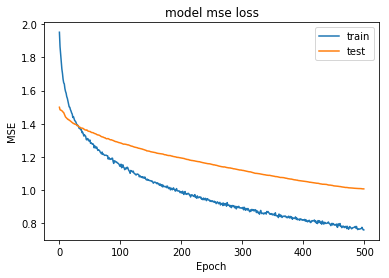

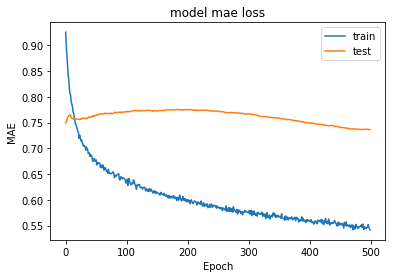

In [0]:
#plotting data
# print(history.history.keys())

# summarize history for mse
plt.plot(history_ada.history['loss'])
plt.plot(history_ada.history['val_loss'])
plt.title('model mse loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for mae
plt.plot(history_ada.history['mean_absolute_error'])
plt.plot(history_ada.history['val_mean_absolute_error'])
plt.title('model mae loss')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
# losses_lr = []
# val_losses_lr = []
# cosine_lr = []
# val_cosine_lr = []

# for l in lr:
#   tf.set_random_seed(1)

#   estimator = KerasRegressor(build_fn=NNRegression(lr=l), batch_size=128,epochs=1000)
#   earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', baseline=0.4, verbose=True)

#   #estimator.fit(X_train, y_train, validation_split=0.1, callbacks=[earlystopper])
#   history = estimator.fit(X_scaled, y_scaled, validation_split=0.2)
  
#   losses_lr.append(history.history['mean_absolute_error'][-1])
#   val_losses_lr.append(history.history['val_mean_absolute_error'][-1])
  
#   cosine_lr.append(history.history['cosine'][-1])
#   val_cosine_lr.append(history.history['val_cosine'][-1])
  
#   prediction = estimator.predict(X_test)

#   mae = np.sum(np.abs(np.subtract(prediction,y_test)))/len(X_test[:,0])

#   print(mae)

NameError: ignored

In [0]:
# def NNRegression():
#   model = tf.keras.Sequential()
#   # Adds a densely-connected layer with 64 units to the model:
#   model.add(layers.Dense(32, input_dim=5, activation='relu'))
#   # Add another:
#   model.add(layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)))
#   # Add another:
# #   model.add(layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), bias_regularizer=tf.keras.regularizers.l2(0.0001)))
#   # Add another:
#   model.add(layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)))
#   # Add the output layer
#   model.add(layers.Dense(1))
  
# #   opt = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
# #   opt = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
#   opt = tf.keras.optimizers.AdaGrad(lr=0.01, epsilon=1e-08, decay=0.0)
   
#   model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])
#   return model


In [0]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# estimator = KerasRegressor(build_fn=NNRegression, batch_size=128,epochs=1000)
# #earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', min_delta=0.00001, verbose=True)
  
# #estimator.fit(X_train, y_train, validation_split=0.1, callbacks=[earlystopper])
# estimator.fit(X_train, y_train, validation_split=0.2)

# prediction = estimator.predict(X_test)

# mae = np.sum(np.abs(np.subtract(prediction,y_test)))/len(X_test[:,0])

# print(mae)

In [0]:
# regressor.fit(X_train, y_train)
# print(regressor.prid(X_test, y_test))

# #from sklearn.model_selection import KFold, cross_val_score
# #seed=10
# #kfold = KFold(n_splits=10, random_state=seed)
# #results = cross_val_score(regressor, X_scaled, y_scaled, cv=kfold)
# #print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))